# Simple Auto Encoder

In [1]:
import numpy as np
import tensorflow as tf
tf.random.set_seed(2021)
np.random.seed(2021)
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from IPython.display import Image

### MNIST 데이터 준비

In [3]:
from tensorflow.keras.datasets import mnist

(x_train, _), (x_test, _) = mnist.load_data()

In [4]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

### 인코더와 디코더 - single fully-connected neural layer

In [5]:
# 인코딩될 표현(representation)의 크기
encoding_dim = 32

# 입력 플레이스홀더
input_img = Input(shape=(784,))
# "encoded"는 입력의 인코딩된 표현
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded"는 입력의 손실있는 재구성 (lossy reconstruction)
decoded = Dense(784, activation='sigmoid')(encoded)

# 입력을 입력의 재구성으로 매핑할 모델
autoencoder = Model(input_img, decoded)

In [6]:
# 분리된 인코더 모델
encoder = Model(input_img, encoded)

In [7]:
# 디코더 모델

# 인코딩된 입력을 위한 플레이스 홀더
encoded_input = Input(shape=(encoding_dim,))
# 오토인코더 모델의 마지막 레이어 얻기
decoder_layer = autoencoder.layers[-1]
# 디코더 모델 생성
decoder = Model(encoded_input, decoder_layer(encoded_input))

### 학습 설정 및 훈련

In [8]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [9]:
autoencoder.fit(x_train, x_train,
                epochs=500,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/500
235/235 [==============================] - 3s 10ms/step - loss: 0.6939 - val_loss: 0.6938
Epoch 2/500
235/235 [==============================] - 2s 8ms/step - loss: 0.6937 - val_loss: 0.6936
Epoch 3/500
235/235 [==============================] - 2s 8ms/step - loss: 0.6935 - val_loss: 0.6935
Epoch 4/500
235/235 [==============================] - 2s 8ms/step - loss: 0.6934 - val_loss: 0.6933
Epoch 5/500
235/235 [==============================] - 2s 8ms/step - loss: 0.6932 - val_loss: 0.6931
Epoch 6/500
235/235 [==============================] - 2s 8ms/step - loss: 0.6930 - val_loss: 0.6930
Epoch 7/500
235/235 [==============================] - 2s 7ms/step - loss: 0.6929 - val_loss: 0.6928
Epoch 8/500
235/235 [==============================] - 2s 8ms/step - loss: 0.6927 - val_loss: 0.6926
Epoch 9/500
235/235 [==============================] - 2s 8ms/step - loss: 0.6926 - val_loss: 0.6925
Epoch 10/500
235/235 [==============================] - 2s 7ms/step - loss: 0.6924 - val_l

### 예측

In [10]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

### 시각화

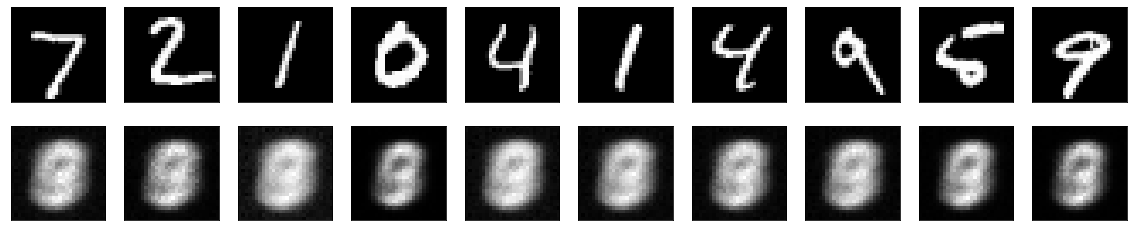

In [11]:
n = 10  # 몇 개의 숫자를 나타낼 것인지
plt.figure(figsize=(20, 4))
for i in range(n):
    # 원본 데이터
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 재구성된 데이터
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()